<hr>
# Machine Learning in Python: Getting Started with scikit-learn  
  
<img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="width: 160px;" align="left"/>  

## scikit-learn is a popular Python machine learning library, providing a wealth of easy-to-use tools to perform a variety of machine learning tasks. If you're new to machine learning, scikit-learn is a great way to start.  

## The [scikit-learn.org](http://scikit-learn.org/stable/) website provides extensive documentation (Tutorials, User Guide, API Reference, sample code).  

## [Installation](http://scikit-learn.org/stable/install.html) (prerequisites: Python, NumPy, SciPy)

```
pip install --upgrade scikit-learn
```
#### or
```
conda install scikit-learn
```
## Note: scikit-learn offers only minimal neural network support, with Multi-layer Perceptrons and Restricted Boltzmann Machine feature learners. For more flexible deep learning models and GPU support, look at libraries such as Keras or TensorFlow.
<hr>

### Two Recommended Machine Learning Resources:  

<img src="http://www-bcf.usc.edu/~gareth/ISL/ISL%20Cover%202.jpg" style="width: 200px;" align="left"/>
<img src="https://covers.oreillystatic.com/images/0636920052289/lrg.jpg" style="width: 232px;" align="center"/>  

### [An Introduction to Statistical Learning (Authors' page, free PDF download)](http://www-bcf.usc.edu/~gareth/ISL/)  
>"This book provides an introduction to statistical learning methods. It is aimed for upper level undergraduate students, masters students and Ph.D. students in the non-mathematical sciences... and should be a valuable resource for a practicing data scientist."  

### [Hands-On Machine Learning with Scikit-Learn and TensorFlow (O'Reilly)](http://shop.oreilly.com/product/0636920052289.do)  
>"By using concrete examples, minimal theory, and two production-ready Python frameworks—scikit-learn and TensorFlow—author Aurélien Géron helps you gain an intuitive understanding of the concepts and tools for building intelligent systems."  


# Example: Predicting Forest Cover from Cartographic Variables  

### This notebook uses the Forest CoverType dataset, created by the Remote Sensing and GIS Program in the Department of Forest Sciences at Colorado State University, Fort Collins, Colorado.  
### Information about the Forest CoverType dataset is [found](https://archive.ics.uci.edu/ml/datasets/covertype) at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php):    

<img src="http://archive.ics.uci.edu/ml/assets/logo.gif" />  

<hr>
For convenience, the **sklearn.datasets** module includes utilities for loading and generating datasets, including method fetch_covtype() to load the Forest CoverType dataset. See the [scikit-learn *Dataset loading utilities*](http://scikit-learn.org/stable/datasets/index.html#datasets) page for more information on these helpful utilities.

## Let's get started!

In [1]:
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

import sklearn.datasets

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

#### Define a helper function for later use

In [2]:
def delta_t(start_time):
    """
    Formatted time-delta convenience utility
    """
    delta = datetime.now() - start_time
    return str(timedelta(seconds=round(delta.total_seconds())))

### Download and format the CoverType data

In [3]:
# Fetched data are cached locally.
dataset = sklearn.datasets.fetch_covtype()
print('Fetched object type:', type(dataset))

Fetched object type: <class 'sklearn.utils.Bunch'>


In [4]:
print(dataset.DESCR)

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



### Save the data and labels into X (features) and y (response) numpy arrays

In [5]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

(581012, 54) (581012,)


## Inspect the data

**[Attribute Information](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) (from the UCI CoverType info page)**

**Name, Data Type, Measurement, Description**

+ Elevation, quantitative, meters, Elevation in meters
+ Aspect, quantitative, azimuth, Aspect in degrees azimuth
+ Slope, quantitative, degrees, Slope in degrees
+ Horizontal_Distance_To_Hydrology, quantitative, meters, Horz Dist to nearest surface water features
+ Vertical_Distance_To_Hydrology, quantitative, meters, Vert Dist to nearest surface water features
+ Horizontal_Distance_To_Roadways, quantitative, meters, Horz Dist to nearest roadway
+ Hillshade_9am, quantitative, 0 to 255 index, Hillshade index at 9am, summer solstice
+ Hillshade_Noon, quantitative, 0 to 255 index, Hillshade index at noon, summer soltice
+ Hillshade_3pm, quantitative, 0 to 255 index, Hillshade index at 3pm, summer solstice
+ Horizontal_Distance_To_Fire_Points, quantitative, meters, Horz Dist to nearest wildfire ignition points
+ Wilderness_Area (**4 binary columns**), qualitative, 0 (absence) or 1 (presence), Wilderness area designation
+ Soil_Type (**40 binary columns**), qualitative, 0 (absence) or 1 (presence), Soil Type designation
+ Cover_Type (7 types), integer, 1 to 7, Forest Cover Type Classes  

**Forest Cover Type Classes:**  
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz


### Now let's look at the X features array

In [6]:
# Create column header for inspection convenience only
column_names = (['elev', 'aspect', 'slope', 'hdist_hydro', 'vdist_hydro',
                 'hdist_road', 'shade9', 'shade12', 'shade3', 'hdist_fire'] +
                ['wild' + str(n+1) for n in range(4)] +
                ['soil' + str(n+1) for n in range(40)]
               )
pd.set_option('display.max_columns', X.shape[1])

In [7]:
df = pd.DataFrame(X, columns=column_names)
df.head()

,elev,aspect,slope,hdist_hydro,vdist_hydro,hdist_road,shade9,shade12,shade3,hdist_fire,wild1,wild2,wild3,wild4,soil1,soil2,soil3,soil4,soil5,soil6,soil7,soil8,soil9,soil10,soil11,soil12,soil13,soil14,soil15,soil16,soil17,soil18,soil19,soil20,soil21,soil22,soil23,soil24,soil25,soil26,soil27,soil28,soil29,soil30,soil31,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
elev           581012 non-null float64
aspect         581012 non-null float64
slope          581012 non-null float64
hdist_hydro    581012 non-null float64
vdist_hydro    581012 non-null float64
hdist_road     581012 non-null float64
shade9         581012 non-null float64
shade12        581012 non-null float64
shade3         581012 non-null float64
hdist_fire     581012 non-null float64
wild1          581012 non-null float64
wild2          581012 non-null float64
wild3          581012 non-null float64
wild4          581012 non-null float64
soil1          581012 non-null float64
soil2          581012 non-null float64
soil3          581012 non-null float64
soil4          581012 non-null float64
soil5          581012 non-null float64
soil6          581012 non-null float64
soil7          581012 non-null float64
soil8          581012 non-null float64
soil9          581012 non-null 

**The pandas.DataFrame.info(), above, shows there's no missing values in our data set.**

In [9]:
df.describe()

,elev,aspect,slope,hdist_hydro,vdist_hydro,hdist_road,shade9,shade12,shade3,hdist_fire,wild1,wild2,wild3,wild4,soil1,soil2,soil3,soil4,soil5,soil6,soil7,soil8,soil9,soil10,soil11,soil12,soil13,soil14,soil15,soil16,soil17,soil18,soil19,soil20,soil21,soil22,soil23,soil24,soil25,soil26,soil27,soil28,soil29,soil30,soil31,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [10]:
%matplotlib inline
matplotlib.style.use('seaborn')

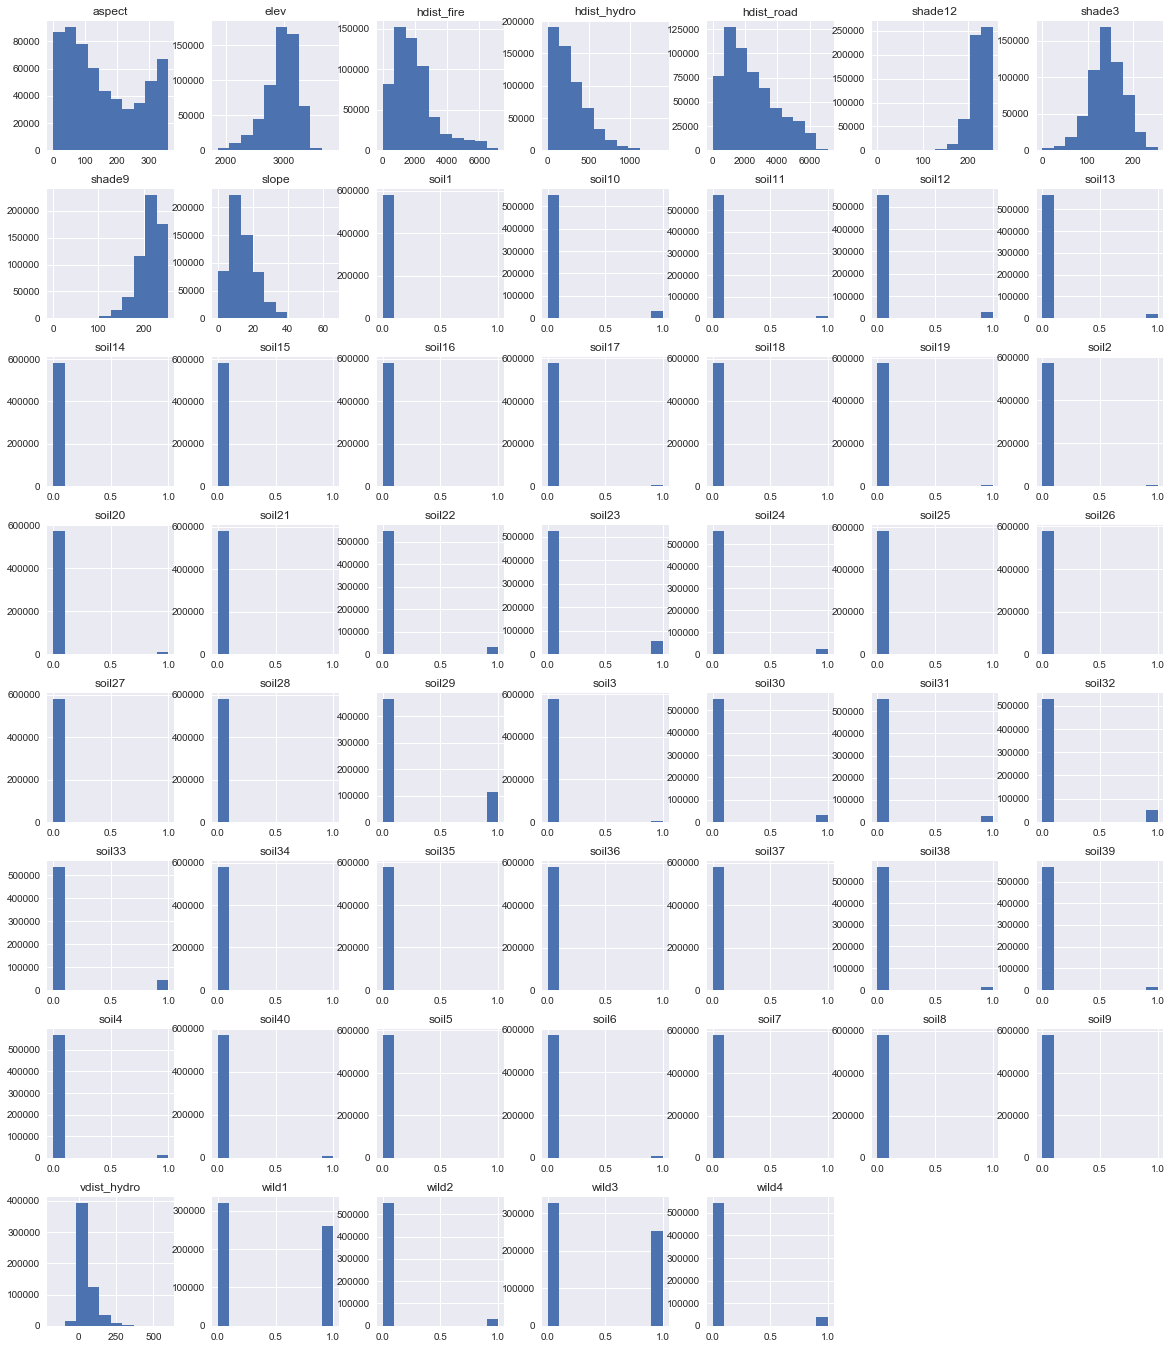

In [11]:
df.hist(figsize=(20, 24))
plt.show()

### The seven forest cover type class labels (1-7):

In [12]:
classes = np.unique(y)
print(classes)

[1 2 3 4 5 6 7]


### Plot the class frequencies

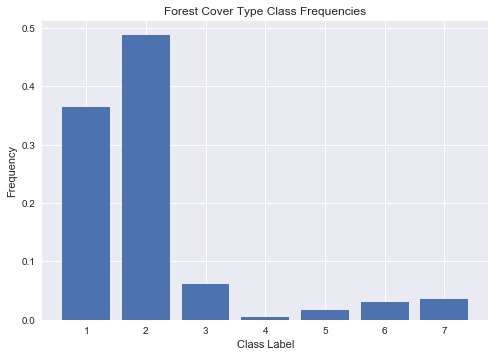

In [13]:
plt.bar(classes, np.bincount(y)[classes]/y.shape[0], tick_label=classes)
plt.title('Forest Cover Type Class Frequencies')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

**The plot shows class frequencies are highly nonuniform, ranging between about 1% to almost 50%.**

<hr>
# Basic steps to train a model and predict on test data:
#### 1. Separate the data set into training and test sets

```python
from sklearn.model_selection import train_test_split

# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
``` 

#### 2. Scale your data, as necessary, an important pre-training step

```python
from sklearn.preprocessing import StandardScaler

# Choose your scaling method (see http://scikit-learn.org/stable/modules/preprocessing.html)
scaler = StandardScaler()

# Fit the scaler to your training data, then transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Important! Transform test data using the scaler fit to the training data only.
X_test_scaled = scaler.transform(X_test)
``` 

#### 3. Create an instance of your estimator (e.g. Random Forest Classifier)
```python
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
```

#### 4. Fit your model with scaled training data
```python
clf.fit(X_train_scaled, y_train)
```

#### 5. Predict results for your scaled test data
```python
y_hat = clf.predict(X_test_scaled)
```

#### 6. Evaluate the test prediction results
```python
from sklearn.metrics import accuracy_score

print('Accuracy score:', accuracy_score(y_test, y_hat))
```

<hr>
# A Better Way: Model Tuning with Validation Data
#### 1. Separate the data into three sets: training, validation, and test
#### 2. Scale data (remember to fit only on training data)
#### 3. Create estimator
#### 4. Fit model with scaled training data
#### 5. Validate model by predicting on validation data
#### 6. Tune model hyperparameters by repeating Steps 3-5
#### 7. Predict and evaluate final results for scaled test data

<hr>
# An Even Better Way: Pipelines and Cross-Validation  
Pipelines help avoid leaking statistics from your validation data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors. See the scikit-learn User Guide section [Pipeline and FeatureUnion: combining estimators](http://scikit-learn.org/stable/modules/pipeline.html) for more information on pipelines.

### Split data into training and test sets (no validation set)  
```python
X_train, X_test, y_train, y_test = train_test_split(X, y)
```
### Create a transformer/estimator pipeline
Passing a pipeline as the estimator into the K-fold cross-validation function ensures that only the training data folds are used to fit the scaler. In other words, using a pipeline prevents the validation folds from being part of (leaking into) the scaler fitting operation.  
```python
# Simple transformer + classifier pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
```
### Run cross-validation on the pipeline with training data set  
```python
scores = cross_val_score(pipeline, X_train, y_train)
```

<hr>
## Choosing the Right Estimator (e.g. Classifier, Regressor)

### [Research Paper: *Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?*](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf)  

### [scikit-learn flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

> *"Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.*  
> *Different estimators are better suited for different types of data and different problems.*  
> *The flowchart below is designed to give users a bit of a rough guide on how to approach problems*  
> *with regard to which estimators to try on your data."*  

![](http://scikit-learn.org/stable/_static/ml_map.png)

## Train models using a selection of scikit-learn classifiers

### Instantiate a group of classifiers

In [14]:
# Suppress unnecessary FutureWarning from SGDClassifier
warnings.simplefilter('ignore', FutureWarning)

classifiers = [
    ('Linear SVM w/SGD', SGDClassifier(), StandardScaler()), # default loss='hinge' gives linear SVM
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3), MinMaxScaler()),
    ('Random Forest', RandomForestClassifier(), StandardScaler())
]

### Prepare the train and test data sets

In [15]:
# Create stratified train/test 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Run 5-Fold Cross-Validation scoring on each classifier

In [16]:
scoring = 'accuracy'
for name, clf, scaler in classifiers:
    start = datetime.now()
    # Build the transformer/classifier pipeline
    pipeline = make_pipeline(scaler, clf)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scoring)
    mean, std = scores.mean(), scores.std()
    format_str = '{}, mean {} {:.3f} +/-{:.3f}, runtime {}'
    print(format_str.format(name, scoring, mean, 2*std, delta_t(start)), flush=True)

Linear SVM w/SGD, mean accuracy 0.707 +/-0.006, runtime 0:00:18
K-Nearest Neighbors, mean accuracy 0.935 +/-0.001, runtime 0:39:45
Random Forest, mean accuracy 0.936 +/-0.002, runtime 0:01:11


### [Original study's classification performance:](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info)
+ First 11,340 records (1.95%) used for training data subset
+ Next 3,780 records (0.65%) used for validation data subset
+ Last 565,892 records (97.4%) used for testing data subset
+ 70% accuracy - Neural Network (backpropagation)
+ 58% accuracy - Linear Discriminant Analysis

## Hyperparameter tuning with grid search cross-validation

In [17]:
# Create the Transformer/Classifier pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

### Construct the GridSearchCV parameter grid

```GridSearchCV``` requires a grid of parameters (```param_grid```) to search over, a dictionary of *parameter_name*: *[parameter_list]* key-value pairs. In this example, the GridSearchCV ```estimator``` input is a Pipeline object containing multiple estimators, so each ```param_grid``` key must be associated with the correct estimator using the (awkward, IMO) ```<estimator_name>__<parameter>``` syntax:
```python
pipeline.get_params()  

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 
...

 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None, verbose=0,
               warm_start=False))]
}
```

In [18]:
param_grid = {'randomforestclassifier__max_features': ['auto', None],  # [sqrt(n_features), n_features]
              'randomforestclassifier__n_estimators': [10, 50]}

### Run the GridSearchCV

In [19]:
start = datetime.now()
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
grid.fit(X_train, y_train)
print('GridSearchCV runtime:', delta_t(start))
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

GridSearchCV runtime: 0:41:47
Best score: 0.963062247074
Best parameters: {'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 50}


#### Note: See the scikit-learn User Guide section [*Caching transformers: avoid repeated computation*](http://scikit-learn.org/stable/modules/pipeline.html#caching-transformers-avoid-repeated-computation) on using memory caching with Pipelines to avoid unnecessary, repetitious computations with operations such as grid search.

### Look "under the hood" at GridSearchCV results

In [20]:
grid.cv_results_

{'mean_fit_time': array([  13.55666003,   60.96696992,   56.13829141,  277.23521771]),
 'mean_score_time': array([ 0.36201787,  1.47007217,  0.31293116,  1.26806231]),
 'mean_test_score': array([ 0.93671594,  0.94894892,  0.956864  ,  0.96306225]),
 'mean_train_score': array([ 0.99761999,  0.99996988,  0.99788193,  0.99995321]),
 'param_randomforestclassifier__max_features': masked_array(data = ['auto' 'auto' None None],
              mask = [False False False False],
        fill_value = ?),
 'param_randomforestclassifier__n_estimators': masked_array(data = [10 50 10 50],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'randomforestclassifier__max_features': 'auto',
   'randomforestclassifier__n_estimators': 10},
  {'randomforestclassifier__max_features': 'auto',
   'randomforestclassifier__n_estimators': 50},
  {'randomforestclassifier__max_features': None,
   'randomforestclassifier__n_estimators': 10},
  {'randomforestclassifier__max_features':

### Predict on the test data using the best model from GridSearchCV

In [21]:
y_pred = grid.predict(X_test)

### Report prediction metrics

In [22]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=classes, columns=classes))

Accuracy: 0.968012874022

Classification report:
              precision    recall  f1-score   support

          1       0.97      0.97      0.97     42368
          2       0.97      0.98      0.97     56661
          3       0.96      0.97      0.96      7151
          4       0.92      0.88      0.90       549
          5       0.94      0.86      0.90      1899
          6       0.94      0.93      0.94      3473
          7       0.97      0.96      0.97      4102

avg / total       0.97      0.97      0.97    116203

Confusion matrix:

       1      2     3    4     5     6     7
1  40957   1298     1    0    15     5    92
2   1098  55343    73    0    78    53    16
3      3     72  6908   32    11   125     0
4      0      0    58  482     0     9     0
5     22    227    11    0  1634     5     0
6      1     69   158   10     7  3228     0
7    147     21     0    0     0     0  3934


<hr>
### Grid search alternative: [Randomized hyperparameter tuning](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with RandomizedSearchCV

```python
class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, n_iter=10, 
                                                 scoring=None, fit_params=None, n_jobs=1,
                                                 iid=True, refit=True, cv=None, verbose=0,
                                                 pre_dispatch='2*n_jobs', random_state=None,
                                                 error_score='raise', return_train_score=True
                                                )
```

### Save fitted model to disk for reuse

In [23]:
with open('my_good_model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

### Load fitted model from disk

In [24]:
with open('my_good_model.pkl', 'rb') as f:
    clf = pickle.load(f)

#### See the scikit-learn User Guide [Model persistence](http://scikit-learn.org/stable/modules/model_persistence.html) section on using sklearn.externals.joblib dump/load:
>"... which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators"

## Before you leave: A warning about the ```n_jobs``` parameter for multiprocessing
Many scikit-learn methods include an ```n_jobs``` parameter for running in multiprocessing mode. This option seems like an obvious time-saver for faster model training, and earlier versions of this notebook provided examples for using ```n_jobs```.  

Quite by accident, however, I learned that when using ```n_jobs = -1``` with the ```RandomForestClassifier```, the resulting test data predictions are non-deterministic; i.e. they vary each time I call model.predict() on the same test data!  

This behavior surprised me, and I think it's likely a bug. I could not reproduce the problem with the other classifiers used in this notebook, so the problem may be contained to ```RandomForestClassifier```. For now, I'll leave the ```n_jobs``` parameter at its default value (1) to ensure single-processing mode.  